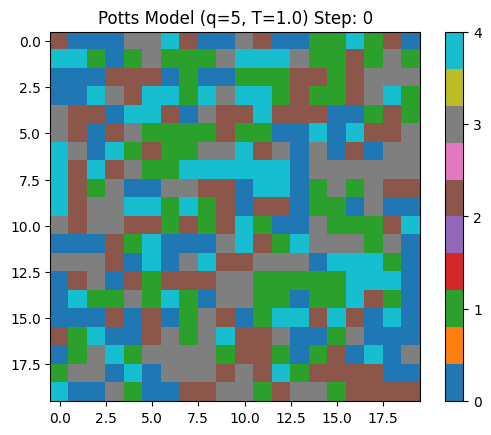

Step: 0, Energy: -243.0, Free Energy: -399.4202025003322, Entropy: 55.44347284422582


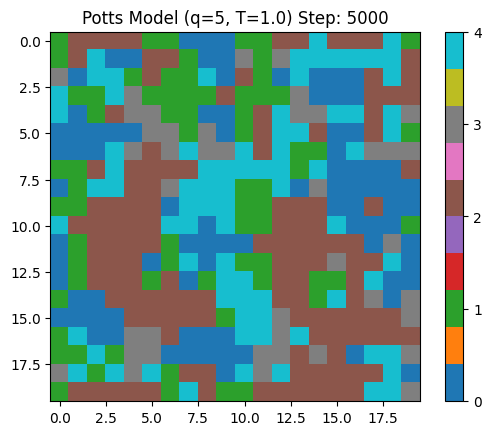

Step: 5000, Energy: -364.0, Free Energy: -395.6067498971536, Entropy: 89.39483597590589


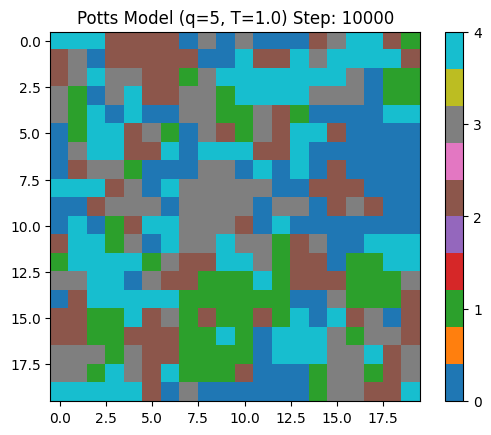

Step: 10000, Energy: -352.0, Free Energy: -404.49074218264633, Entropy: 22.39768782260188


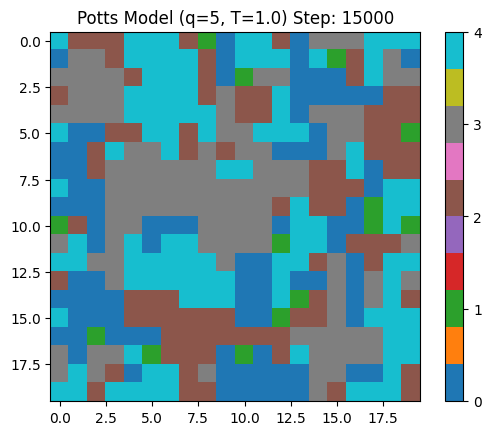

Step: 15000, Energy: -413.0, Free Energy: -409.44341798231136, Entropy: 46.41983880054789


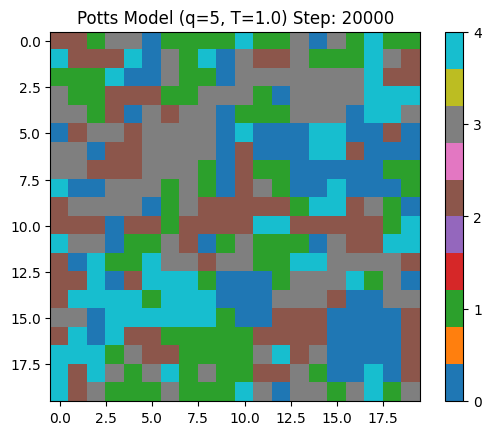

Step: 20000, Energy: -341.0, Free Energy: -410.7081267484797, Entropy: 54.399780509293635


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
L = 20  # Lattice size
q = 5  # Number of states
T = 1.0  # Temperature
n_steps = 20002  # Number of Metropolis steps
k_B = 1.0  # Boltzmann constant (set to 1 in natural units)

# Initialize the lattice with random states
lattice = np.random.randint(0, q, (L, L))

# Energy function (total energy of the lattice)
def total_energy(lattice):
    energy = 0
    for i in range(L):
        for j in range(L):
            spin = lattice[i, j]
            neighbors = [(i - 1) % L, (i + 1) % L, (j - 1) % L, (j + 1) % L]
            for neighbor in [(neighbors[0], j), (neighbors[1], j), (i, neighbors[2]), (i, neighbors[3])]:
                if lattice[neighbor] == spin:
                    energy -= 1  # Interaction energy (-1 if neighbors are the same)
    return energy / 2  # Divide by 2 to avoid double-counting neighbors

# Energy difference for Metropolis step
def delta_energy(lattice, i, j, spin_new, spin_old):
    neighbors = [(i - 1) % L, (i + 1) % L, (j - 1) % L, (j + 1) % L]
    dE = 0
    for neighbor in [(neighbors[0], j), (neighbors[1], j), (i, neighbors[2]), (i, neighbors[3])]:
        dE += int(lattice[neighbor] == spin_new) - int(lattice[neighbor] == spin_old)
    return - dE

# Metropolis step
def metropolis_step(lattice, T):
    for _ in range(L * L):
        i, j = np.random.randint(0, L, 2)
        spin_old = lattice[i, j]
        spin_new = np.random.randint(0, q)
        if spin_new != spin_old:
            dE = delta_energy(lattice, i, j, spin_new, spin_old)
            if dE <= 0 or random.random() < np.exp(-dE / T):
                lattice[i, j] = spin_new

# Partition function (estimate by Monte Carlo sampling)
def partition_function(lattice, T, n_samples=100):
    Z = 0
    for _ in range(n_samples):
        metropolis_step(lattice, T)
        Z += np.exp(-total_energy(lattice) / T)
    return Z / n_samples

# Free energy
def free_energy(lattice, T, n_samples=100):
    Z = partition_function(lattice, T, n_samples)
    return -k_B * T * np.log(Z)

# Entropy
def entropy(lattice, T, n_samples=100):
    E = np.mean([total_energy(lattice) for _ in range(n_samples)])  # Average energy
    F = free_energy(lattice, T, n_samples)
    return (E - F) / T

# Visualization function
def plot_lattice(lattice, step):
    plt.imshow(lattice, cmap='tab10', vmin=0, vmax=q-1)
    plt.colorbar(ticks=range(q))
    plt.title(f"Potts Model (q={q}, T={T}) Step: {step}")
    plt.show()

# Main simulation loop
def simulate_potts(L, q, T, n_steps, compute_properties=False):
    lattice = np.random.randint(0, q, (L, L))
    
    energies = []
    entropies = []
    free_energies = []

    for step in range(n_steps):
        metropolis_step(lattice, T)
        if step % 5000 == 0:
            plot_lattice(lattice, step)
            if compute_properties:
                E = total_energy(lattice)
                F = free_energy(lattice, T)
                S = entropy(lattice, T)
                print(f"Step: {step}, Energy: {E}, Free Energy: {F}, Entropy: {S}")
                energies.append(E)
                free_energies.append(F)
                entropies.append(S)

    return energies, free_energies, entropies

# Run simulation with energy, free energy, and entropy calculations
energies, free_energies, entropies = simulate_potts(L, q, T, n_steps, compute_properties=True)


In [26]:
free_energies

[-304.0901260236918,
 -305.28806484432266,
 -297.42723314537784,
 -309.1966623606048,
 -315.08991600389163,
 -312.8666817325912,
 -306.40368766838907,
 -301.9505191595133,
 -309.1662460948811,
 -309.3908220835133]